In [7]:
import re
import numpy as np

from matplotlib import pyplot
%matplotlib inline
import sklearn.datasets
from sklearn import preprocessing

# Data loading

In [8]:
# I use the code snippet from https://stackoverflow.com/questions/7368739/numpy-and-16-bit-pgm/7369986
# It read PGM image buffer string and return a numpy array
def read_pgm2(buffer, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.
    Format specification: http://netpbm.sourceforge.net/doc/pgm.html
    """
    #with open(filename, 'rb') as f:
    #    buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    #print 'width',width, 'height', height
    
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=15#len(header)
                            ).reshape((int(height), int(width)))

In [9]:
dataset0 = sklearn.datasets.load_files('CroppedYale', shuffle=True)

In [10]:
print dir(dataset0)

['DESCR', 'data', 'filenames', 'target', 'target_names']


CroppedYale/yaleB11/yaleB11_P00A-035E+15.pgm
10
yaleB11
1280


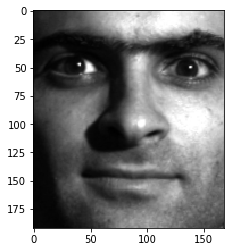

In [11]:
# Here is some sanity checks of the parsed dataset
idx0 = len(dataset0.filenames)-1
print dataset0.filenames[idx0]
print dataset0.target[idx0]
print dataset0.target_names[dataset0.target[idx0]]
print len(dataset0.filenames)
image0 = read_pgm2(dataset0.data[idx0])
pyplot.imshow(image0, pyplot.cm.gray)

In [12]:
# This cell includes the splittign of training and test set.
size0 = 1280
separate = 1024
X = np.stack(map(read_pgm2, dataset0.data))
X = X[:size0]

shapeX = X.shape
X = X.reshape((shapeX[0],shapeX[1]*shapeX[2]))
X = preprocessing.scale(X.astype(float),axis=1) # Mean removal and variance scaling

y = dataset0.target
y = y[:size0]
#imageX = X[0].reshape((shapeX[1],shapeX[2]))
#pyplot.imshow(imageX, pyplot.cm.gray)

print X.shape, y.shape

X_train = X[:separate]
y_train = y[:separate]
X_test = X[separate:]
y_test = y[separate:]

print y_test[:10]

(1280, 32256) (1280,)
[11 13 14 16  9  9  2  1  9 19]
